In [1]:
!pip install opencv-python


In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

The type of this input is <class 'numpy.ndarray'>
Shape: (726, 728, 3)


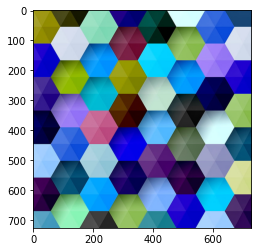

In [3]:
image = cv2.imread('IMAGE.jpg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

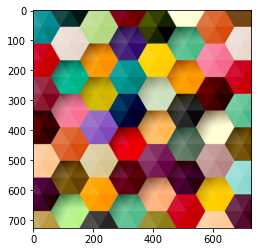

In [4]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

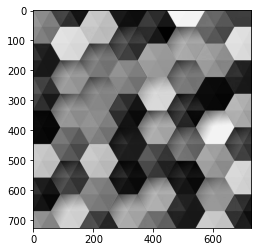

In [5]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

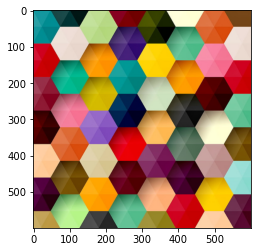

In [6]:
resized_image = cv2.resize(image, (600, 600))
plt.imshow(resized_image)

In [7]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [8]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [9]:
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

[array([112.8763564 ,   6.84255849,  33.69163763]),
 array([ 18.45749041,  87.93631692, 209.92402264]),
 array([235.06332237, 218.89172149,  57.86814693]),
 array([173.37535653,  92.56061038,  26.1993725 ]),
 array([  8.33868469, 125.1991429 ,  60.9636064 ]),
 array([197.22427967,  79.92473462, 178.00622556]),
 array([ 95.21005009, 125.86605267, 225.22523833]),
 array([155.46839977,  33.02840471, 120.65905091]),
 array([202.41459212, 150.09246563,  22.46903758]),
 array([177.96820076,  16.73787117,  36.57814447]),
 array([ 12.39745419,  63.89986832, 142.64194009]),
 array([225.00020194, 220.86207593, 225.95759289]),
 array([ 26.14919535, 195.71334376,  99.02771569]),
 array([ 83.36997864,  52.93562494, 154.85538493]),
 array([107.17141316, 149.47001079,  40.88640777])]

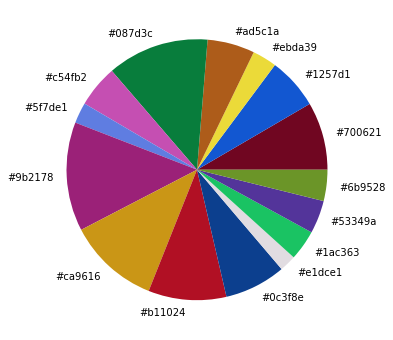

In [10]:
get_colors(get_image('colors.jpeg'), 15, True)

In [11]:
IMAGE_DIRECTORY = 'pictures project'
COLORS = {
     'RED':[255,69,0],
        'GREEN':[0,100,0],
        'WHITE':[255,255,255],
        'VIOLET':[255,0,255],
        'PINK':[255,20,147],
        'ORANGE':[255,165,0],
        'YELLOW':[252, 237, 86],
        'LEAF GREEN':[0,128,0],
        'PURPLE':[91, 165, 255],
        'ORANGE':[255,140,0],
        'BROWN':[150, 75, 0],
        'parrot green':[174, 255, 25]
}
images = []

for file in os.listdir(IMAGE_DIRECTORY):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))

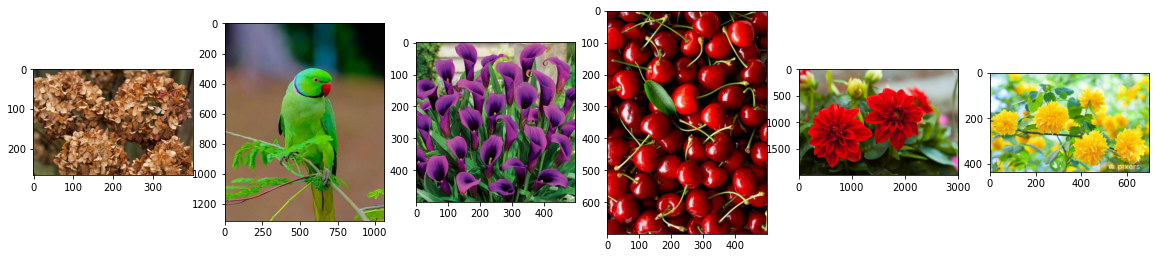

In [12]:
plt.figure(figsize=(20, 10))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])

In [13]:
def match_image_by_color(image, color, threshold = 60, number_of_colors = 10): 
    
    image_colors = get_colors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        if (diff < threshold):
            select_image = True
    
    return select_image

In [14]:
def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
        if (selected):
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            index += 1

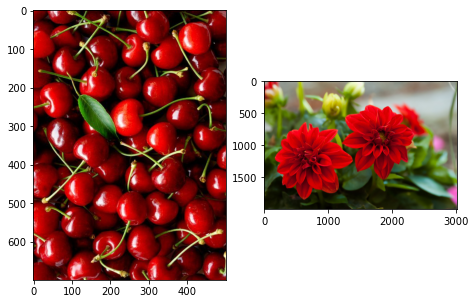

In [15]:
# Search for RED
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['RED'], 60, 5)

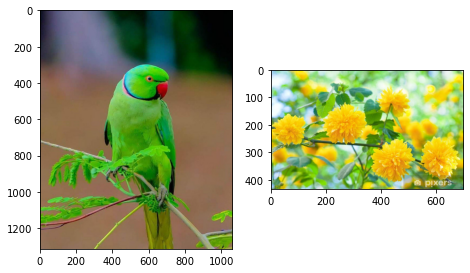

In [16]:
# Search for PARROT GREEN
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['parrot green'], 60, 5)